# Practicum 7 - Midterm Review

# 1. Maximum of a List

Given a list of numbers, write a function that finds the largest value in that list. Do _not_ use the default `min` or `max` functions to solve this problem. 

In [4]:
def get_max(numbers):
    """
    Get the largest value in the list `numbers`
    
    Parameters
    ----------
    numbers: list of ints or floats
    
    Returns
    -------
    Maximum value of the list of numbers
    """
    return max(numbers)

Test your function to make sure that it works.

In [5]:
# Largest value should be 2021
years = [1900, 1934, 1977, 1840, 1965, 1910, 2021, 2000, 2012, 1952, 1922]

max_year = get_max(years)
print(max_year)

2021


In [6]:
# Largest value should be 90
ages = [24, 86, 40, 60, 90, 35, 33, 24, 43, 9, 12, 22, 90]

max_age = get_max(ages)
print(max_age)

90


# 2. Combining Columns

Suppose that you have a list of lists representing rows of data from Facebook's internal logs. Each row (sublist) represents a post, and each column (element of the sublist) represents one of the seven ways a user can react to a post: Like, Love, Care, Haha, Wow, Sad, or Angry. For example:

```python 
reacts = [[201, 52, 190, 11, 0, 33, 2],
          [170, 345, 322, 30, 7, 56, 65],
          [19, 11, 3, 0, 2, 45, 93]]
```

We may be interested in combining the counts of the columns. For example, we may want to count the total number of Likes and Loves on a post, or the total number of Sad and Angry reactions.

Write a function that adds together two columns in the list of lists representing the reactions.

In [10]:
def add_columns(rows, indx1, indx2):
    """
    Adds together two columns in a list of lists dataset
    
    Parameters
    ----------
    rows: list of lists of ints
        Row data where each row is represented by a sublist
    indx1, indx2: int
        Indices of the the two columns to add together
        
    Returns
    -------
    A list of ints representing the values added together for each row
    """
    sum_cols = []
    for curr_row in rows:
        add_nums = curr_row[indx1] + curr_row[indx2]
        sum_cols.append(add_nums)

    return sum_cols

Test your function to make sure that it works. Add together the Love (index 1) and Care (index 2) reactions.

In [11]:
reacts = [[98, 46, 804, 859, 5, 392, 812], 
          [445, 581, 351, 55, 696, 526, 430], 
          [541, 187, 949, 121, 967, 565, 947], 
          [573, 283, 64, 658, 134, 330, 232], 
          [716, 534, 319, 773, 858, 693, 504], 
          [92, 673, 694, 350, 926, 226, 689], 
          [75, 564, 92, 365, 665, 557, 877], 
          [712, 780, 979, 762, 598, 712, 62], 
          [706, 985, 851, 444, 304, 929, 550], 
          [950, 575, 173, 70, 906, 326, 971]]

summed_reacts = add_columns(reacts, 1, 2)
print(summed_reacts)
# Should be: [850, 932, 1136, 347, 853, 1367, 656, 1759, 1836, 748]

[850, 932, 1136, 347, 853, 1367, 656, 1759, 1836, 748]


# 3. Vaccination Status by Age and Race

## 3a. Reading

Suppose we have a medical dataset consisting of patient ages, races, and whether they have yet received a vaccine. Given the name of the file with that data, write a function that reads the data. 

Assume the file has the following structure (including the header). The age can be any positive integer, the race can be `White`, `Black`, `Asian` or `Hispanic`, and the vaccine status can be `0` (did not receive the vaccine) or `1` (did receive the vaccine).

```
age,race,vaccinated
20,White,0
33,Black,1
19,Asian,1
```

In [39]:
import csv

def get_medical_data(filename):
    """
    Gets the medical data about vaccine status
    
    Parameters
    ----------
    filename: str
        The name of the medical data file
        
    Returns
    -------
    List of lists representing the rows of the data
    """
    # open csv + read as single 2D list
    with open(filename, 'r') as file:
        csv_data = list(csv.reader(file, delimiter=','))
        
    # pop header
    csv_data.pop(0)

    # iterate list to convert int & bool types
    for row in csv_data:
        row[0] = int(row[0])
        # convert bools for vax status
        if row[2] == '0':
            row[2] = False
        elif row[2] == '1':
            row[2] = True

    return csv_data

I have provided data for you to read from the file `vaccine_statuses.csv`. Read in the data. (This is synthetic data, i.e. not from any real source).

In [40]:
vaccine_statuses = get_medical_data('vaccine_statuses.csv')

# test output
print(vaccine_statuses[0:3])

[[30, 'White', True], [41, 'White', False], [44, 'White', True]]


## 3b. Filtering 

Now, assume that you have read the vaccine data into a list of lists. Write a function that filters the data by race and an age range. For example, you should be able to filter the data for the vaccine statues of those who are between the ages of 28 and 35 and Black.

In [41]:
def filter_medical_data(data, race, min_age, max_age):
    """
    Filters the medical data according to race and an age range
    
    Parameters
    ----------
    data: list of lists
        The row data of vaccine statuses
    race: str
        The race to filter by: 'White', 'Black', 'Asian', or 'Hispanic'
    min_age, max_age: int
        The minimum and maximum ages (inclusive) to filter by
        
    Returns
    -------
    List of lists representing rows of the data with the specified 
    race and with an age between the min_age and max_age
    """
    # clean data
    race = race.title()
    min_age = float(min_age)
    max_age = float(max_age)
    
    new_data = []      # declare filtered list
    race_bool = False  # default
    age_bool = False   # default
    
    for row in data:
        race_bool = (race == row[1])
        age_bool = (min_age <= row[0] <= max_age)
        if race_bool and age_bool:
            new_data.append(row)
    
    return new_data

Test data and display the first three 10-25 year old hispanic citizens in list:

In [116]:
filtered_vax_data = filter_medical_data(vaccine_statuses, 'hispanic', 10, 25)
print(filtered_vax_data[0:3])

[[16, 'Hispanic', False], [17, 'Hispanic', True], [13, 'Hispanic', True]]


## 3c. Counting

Given the vaccine data as a list of lists, write a function that returns the percent of individuals in that data that are vaccinated.

In [71]:
def get_perc_vaccinated(data):
    """
    Gets the percent of individuals that are vaccinated
    
    Parameters
    ----------
    data: list of lists
        The row data of vaccine statuses
        
    Returns
    -------
    Float indicating the percent of individuals in the data that are vaccinated
    """
    total = len(data)
    """ EASY WAY
    vax_total = 0
    
    for row in data:
        if row[2] == True:
            vax_total += 1
            
    perc_vax = (vax_total / total) * 100
    """
    
    # COOLER WAY
    alt_total = sum(1 for row in data if row[2]==True)
    alt_rate = (alt_total / total) * 100
    
    #return perc_vax, alt_rate
    return alt_rate

Test data and display the vaccination rate for 10-25 year old hispanic citizens in list as computed above:

In [117]:
filtered_perc_vax = get_perc_vaccinated(filtered_vax_data)
#print(filtered_perc_vax)
print(str(round(filtered_perc_vax,3)) + '%')

55.446%


## 3d. Visualizing

Using your functions for filtering the data and counting the percent of individuals who are vaccinated, visualize the vaccination rate by race and grouped by the following age categories:
- 12-15
- 16-19
- 20-29
- 30-49
- 50-64
- 65-74
- 75+

Visualize the data as four lines with markers: one line per race, with 7 points each (one per age bracket). Add a legend to distinguish the lines from one another.

In [77]:
def max_age(data):
    max_age = 0
    for row in data:
        if row[0] > max_age:
            max_age = row[0]
    return max_age

In [119]:
import matplotlib.pyplot as plt

def visualize_vaccine_rates(data):
    """
    Visualizes vaccine rates by age and race
    
    Parameters
    ----------
    data: list of lists
        The row data of vaccine statuses
        
    Returns
    -------
    Plots four lines (one per race) of vaccine rates across age brackets
    """
    top_age = max_age(data)
    # legend info + age bracketing
    races = ['White', 'Black', 'Asian', 'Hispanic']
    age_bracket = [[12,15],[16,19],[20,29],[30,49],[50,64],[65,74],[75,top_age]]
    age_br_len = len(age_bracket)
    race_len = len(races)
    
    plot_data = [[None for x in range(age_br_len)] for y in range(race_len)]
    
    # compute totals for race x age_bracket
    for r_idx,r in enumerate(races):
        for age_idx,ages in enumerate(age_bracket):
            temp_data = filter_medical_data(data, r, ages[0], ages[1])
            temp_rate = get_perc_vaccinated(temp_data)
            plot_data[r_idx][age_idx] = temp_rate
        
    # plot data per race
    for r in range(0,len(races)):
        # scattter (placeholder int,  filtered rate #,)
        plt.plot(range(1,age_br_len+1), plot_data[r], '-|', label=races[r], yunits='%')
        
    # plot prettify
    plt.title("Vaccination Rate by Age + Race")

    x_labels = []
    for ages in age_bracket:
        temp_str = str(ages[0]) + '–' + str(ages[1])
        x_labels.append(temp_str)
    
    y_ticks = [[None for w in range(11)] for t in range(2)]
    y_ticks[0] = range(0,101,10)
    for idx,num in enumerate(y_ticks[0]):
        y_ticks[1][idx] = str(num) + '%'
        

    plt.xticks(range(1,age_br_len+1), x_labels)
    plt.xlabel("Age Bracket (years)")
    plt.ylabel("Vaccination Rate")
    plt.ylim(0,100)
    plt.yticks(y_ticks[0], y_ticks[1])
    plt.legend()
    plt.show()


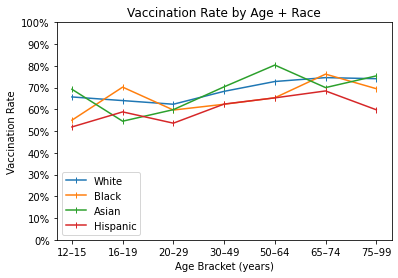

In [120]:
visualize_vaccine_rates(vaccine_statuses)